In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

import torchvision.datasets as dsets
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import random

In [2]:
USE_CUDA = torch.cuda.is_available() # GPU를 사용가능하면 True, 아니라면 False를 리턴
device = torch.device("cuda" if USE_CUDA else "cpu") # GPU 사용 가능하면 사용하고 아니면 CPU 사용
print("다음 기기로 학습합니다:", device)

다음 기기로 학습합니다: cuda


In [3]:
random.seed(81)
torch.manual_seed(81)
if device == 'cuda':
    torch.cuda.manual_seed_all(81)

# Hyperparameters
training_epochs = 30
batch_size = 100

In [4]:
# MNIST Dataset
mnist_train = dsets.MNIST(root='MNIST_data/', train=True, transform=transforms.ToTensor(), download=True)
mnist_test = dsets.MNIST(root='MNIST_data/', train=False, transform=transforms.ToTensor(), download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 16.6MB/s]


Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 498kB/s]


Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 3.93MB/s]


Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 5.40MB/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [5]:
# dataset loader
data_loader = DataLoader(dataset=mnist_train, batch_size=batch_size, shuffle=True, drop_last=True)

In [6]:
linear = nn.Linear(784, 10, bias=True).to(device)

In [7]:
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [8]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        # 배치 크기가 100이므로 아래의 연산에서 X는 (100, 784)의 텐서가 된다.
        X = X.view(-1, 28 * 28).to(device)
        # 레이블은 원-핫 인코딩이 된 상태가 아니라 0 ~ 9의 정수.
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.534833968
Epoch: 0002 cost = 0.359023511
Epoch: 0003 cost = 0.330888003
Epoch: 0004 cost = 0.316147834
Epoch: 0005 cost = 0.306839019
Epoch: 0006 cost = 0.300021350
Epoch: 0007 cost = 0.294681132
Epoch: 0008 cost = 0.290737033
Epoch: 0009 cost = 0.287343681
Epoch: 0010 cost = 0.284362048
Epoch: 0011 cost = 0.281951785
Epoch: 0012 cost = 0.279804230
Epoch: 0013 cost = 0.277778745
Epoch: 0014 cost = 0.276077986
Epoch: 0015 cost = 0.274398297
Epoch: 0016 cost = 0.273116648
Epoch: 0017 cost = 0.271733344
Epoch: 0018 cost = 0.270566374
Epoch: 0019 cost = 0.269277394
Epoch: 0020 cost = 0.268318176
Epoch: 0021 cost = 0.267234713
Epoch: 0022 cost = 0.266412675
Epoch: 0023 cost = 0.265582532
Epoch: 0024 cost = 0.264717758
Epoch: 0025 cost = 0.263842821
Epoch: 0026 cost = 0.263114154
Epoch: 0027 cost = 0.262516171
Epoch: 0028 cost = 0.261827797
Epoch: 0029 cost = 0.261298031
Epoch: 0030 cost = 0.260379136
Learning finished


Accuracy: 0.871399998664856
Label:  9
Prediction:  9


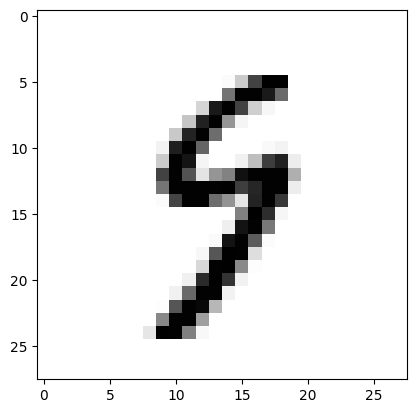

In [10]:
# 테스트 데이터를 사용하여 모델을 테스트한다.
with torch.no_grad(): # torch.no_grad()를 하면 gradient 계산을 수행하지 않는다.
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # MNIST 테스트 데이터에서 무작위로 하나를 뽑아서 예측을 해본다
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()